<a href="https://colab.research.google.com/github/youngolax/AI_Module/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Load the dataset
df_salary = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Salary_Data.csv")

In [26]:
# Display basic information
df_salary.info(), df_salary.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


(None,
    YearsExperience   Salary
 0              1.1  39343.0
 1              1.3  46205.0
 2              1.5  37731.0
 3              2.0  43525.0
 4              2.2  39891.0)

In [28]:
# Extract features (X) and target variable (y)
X = df_salary["YearsExperience"].values.reshape(-1, 1)
y = df_salary["Salary"].values.reshape(-1, 1)


In [29]:
# Normalize the data for better gradient descent convergence
X_norm = (X - np.mean(X)) / np.std(X)
y_norm = (y - np.mean(y)) / np.std(y)

In [44]:
# Add bias term (intercept) to X
#X = np.c_[np.ones(X.shape[0]), X]  # Adding a column of ones for bias term

In [45]:
# Initialize parameters (theta0 - intercept, theta1 - slope)
#theta = np.zeros(2)

In [46]:
# Function to implement Batch Gradient Descent
def gradient_descent(X, y, learning_rate=0.1, iterations=1000):
    m, n = X.shape
    theta = np.zeros((n + 1, 1))  # Initializing parameters (theta0 and theta1)
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias term (x0 = 1)
    cost_history = []

    for iterations in range(iterations):
        gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)  # Compute gradients
        theta -= learning_rate * gradients  # Update parameters
        cost = mean_squared_error(y, X_b.dot(theta))  # Compute cost (MSE)
        cost_history.append(cost)

    return theta, cost_history


In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
# Train the model using Gradient Descent
theta_gd, cost_history = gradient_descent(X_norm, y_norm, learning_rate=0.1, iterations=1000)

In [50]:
# Display final parameters
theta_gd

array([[5.44009282e-17],
       [9.78241618e-01]])

In [51]:
from sklearn.linear_model import LinearRegression

In [55]:
# Train using Scikit-Learn's Linear Regression
model = LinearRegression()
model.fit(X, y)
theta_sklearn = [model.intercept_[0], model.coef_[0][0]]

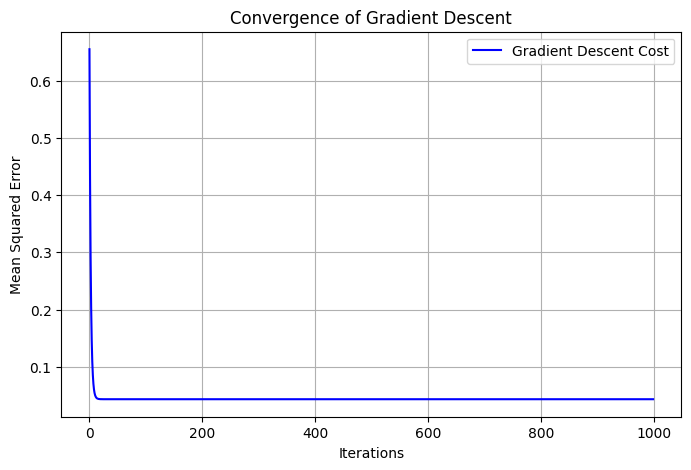

In [63]:
# Plot the cost function over iterations
plt.figure(figsize=(8, 5))
plt.plot(range(len(cost_history)), cost_history, label="Gradient Descent Cost", color='b')
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("Convergence of Gradient Descent")
plt.legend()
plt.grid()
plt.show()

In [68]:
# Display the Scikit-Learn parameters
theta_sklearn

[np.float64(25792.200198668696), np.float64(0.0)]